In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_d = pd.read_csv(city_data)
ride_d = pd.read_csv(ride_data)

In [3]:
# Preview city data
city_d.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Preview ride data
ride_d.head(20)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [8]:
# Combine the data into a single dataset
data = pd.merge(city_d, ride_d, on="city", how="left")

# Display the data table for preview
data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [12]:
# Obtain the x and y coordinates for each of the three city types
urban = data[data["type"] == "Urban"]
urban_riders = urban.groupby(["city"]).count()["ride_id"]
urban_fare = urban.groupby(["city"]).mean()["fare"]
urban_drivers = urban.groupby(["city"]).mean()["driver_count"]

suburban = data[data["type"] == "Suburban"]
suburban_riders = suburban.groupby(["city"]).count()["ride_id"]
suburban_fare = suburban.groupby(["city"]).mean()["fare"]
suburban_drivers = suburban.groupby(["city"]).mean()["driver_count"]

rural = data[data["type"] == "Rural"]
rural_riders = rural.groupby(["city"]).count()["ride_id"]
rural_fare = rural.groupby(["city"]).mean()["fare"]
rural_drivers = rural.groupby(["city"]).mean()["driver_count"]


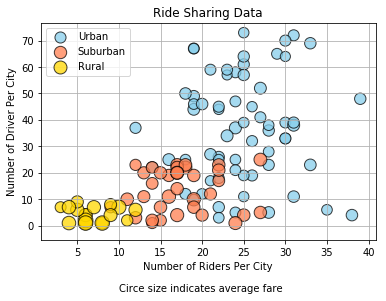

In [56]:
# Build the scatter plots for each city types
# Urban plot
plt.scatter(urban_riders, urban_drivers, s=urban_fare*5, facecolors="skyblue", label="Urban", alpha="0.75", edgecolor="black")

#Suburban plot
plt.scatter(suburban_riders, suburban_drivers, s=suburban_fare*5, facecolors="coral", label="Suburban", alpha="0.75", edgecolor="black")

#Rurl plot
plt.scatter(rural_riders, rural_drivers, s=rural_fare*5, facecolors="gold", label="Rural", alpha="0.75", edgecolor="black")

# Incorporate the other graph properties
plt.title("Ride Sharing Data")
plt.xlabel("Number of Riders Per City")
plt.ylabel("Number of Driver Per City")
plt.grid()

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(10, -25, "Circe size indicates average fare")

# Save Figure
plt.savefig("images/scatter1.png")

# Show plot
plt.show()

## Total Fares by City Type

In [75]:
# Calculate Type Percents
city_per = 100 * data.groupby(["type"]).sum()["fare"] / data["fare"].sum()
city_per



type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

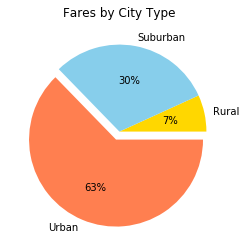

In [76]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
plt.pie(city_per, labels = labels, colors=colors, explode=[0,0,0.1], autopct='%1.0f%%')
plt.title("Fares by City Type")

# Save Figure
plt.savefig("images/pie1.png")

# Show Figure
plt.show()

## Total Rides by City Type

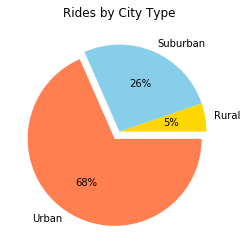

In [77]:
# Calculate Ride Percents
ride_per = 100 * data.groupby(["type"]).count()["ride_id"] / data["ride_id"].count()
ride_per

# Build Pie Chart
plt.pie(ride_per, labels = labels, colors=colors, explode=[0,0,0.1], autopct='%1.0f%%')
plt.title("Rides by City Type")

# Save Figure
plt.savefig("images/pie2.png")

# Show Figure
plt.show()


## Total Drivers by City Type

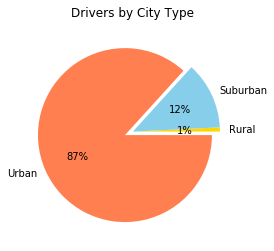

In [79]:
# Calculate Driver Percents
driver_per = 100 * data.groupby(["type"]).sum()["driver_count"] / data["driver_count"].sum()
driver_per

# Build Pie Charts
plt.pie(driver_per, labels = labels, colors=colors, explode=[0,0,0.1], autopct='%1.0f%%')
plt.title("Drivers by City Type")

# Save Figure
plt.savefig("images/pie3.png")

# Show Figure
plt.show()